# Avoidance of Respiratory Viral Infection Scale (ARVIS) development

## Figures

Because I can't use ggplot

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import re
mpl.style.use('toby')
colours = ['#' + i for i in '267fd3-d3265a-fc9403-44af69'.split('-')] + ['#197278']

## Load T1 data

In [2]:
T1_data = pd.read_csv('../data/arvis_wide_clean.csv')

### Response distributions

In [3]:
T1_data_long = pd.melt(T1_data, id_vars='subjectID', var_name='Item', value_name='Response')
T1_data_long = T1_data_long[T1_data_long['Item'].str.contains('Fear')]

In [4]:
T1_data_long['item_number'] = T1_data_long['Item'].str.extract('([0-9]+)').astype(int) - 440

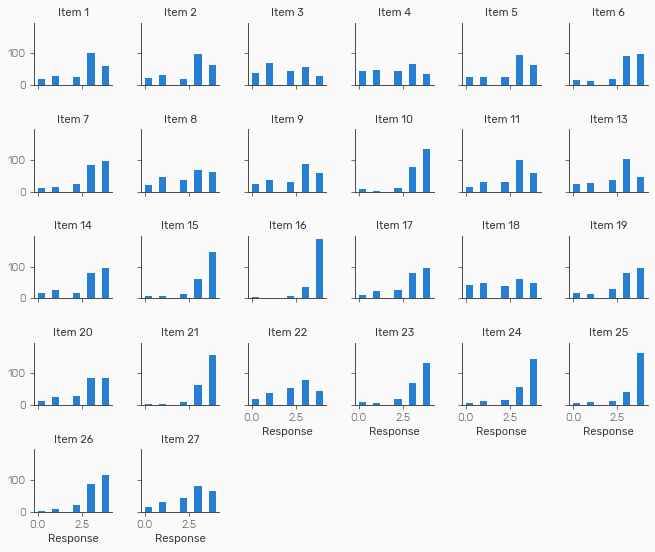

In [5]:
g = sns.FacetGrid(T1_data_long, col='item_number', col_wrap=6, height=1.4)

g = g.map(plt.hist, "Response", color=colours[0]).set_titles("Item {col_name}")

plt.savefig('../figures/response_distributions.svg')

## Correlations between items

In [6]:
T1_data_2 = pd.read_csv('../data/arvis_wide_cleaned_distributions.csv')
T1_data_2 = T1_data_2[[i for i in T1_data_2.columns if 'Fear_' in i]]
T1_data_2.columns = ['Item {0}'.format(int(re.search('[0-9]+', i).group()) - 440) for i in T1_data_2.columns]
T1_data_2.head()

,Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Item 9,Item 11,Item 13,Item 14,Item 17,Item 18,Item 19,Item 20,Item 22,Item 27
0,3,3,1,1,2,3,4,3,1,3,1,1,1,1,3,3,1,1
1,3,3,2,0,1,3,3,1,3,1,3,3,3,1,3,3,1,3
2,3,3,3,0,4,3,4,4,4,3,4,4,4,2,4,4,4,2
3,2,1,0,1,1,3,3,3,2,2,2,3,2,3,3,3,1,2
4,3,4,2,4,4,4,4,4,4,4,4,4,3,3,4,4,3,4


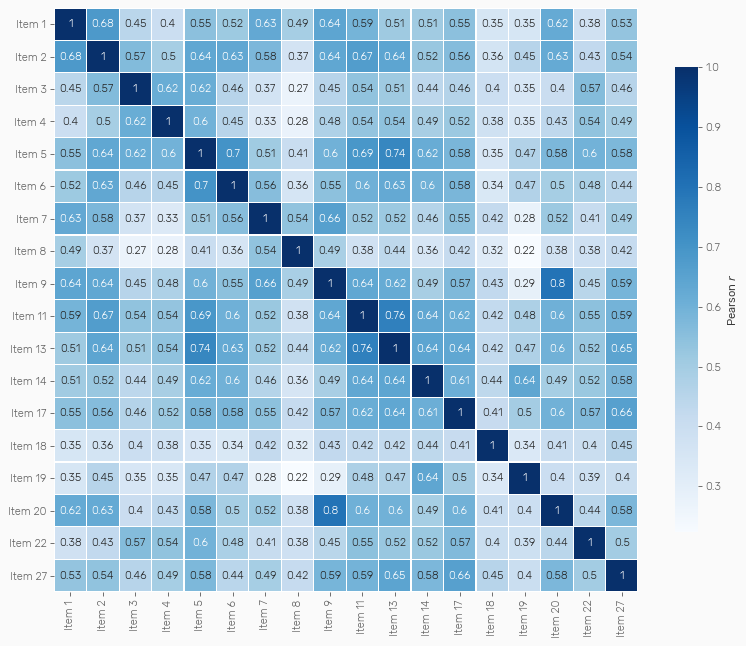

In [7]:
f, ax = plt.subplots(1, 1, figsize=(10, 10), dpi=80)
sns.heatmap(T1_data_2.corr(), cmap='Blues', square=True, annot=True, linewidths=.2, cbar_kws={"label": r"Pearson $r$", 'shrink': 0.6}, ax=ax)

plt.tight_layout()
plt.savefig('../figures/interitem_correlations.svg')

## Parallel analysis

In [8]:
parallel_df = pd.read_csv('../data/parallel_analysis_T1.csv')
parallel_df

,real_values,sim_values
0,8.437929,0.527894
1,0.708689,0.410485
2,0.309890,0.334361
3,0.302223,0.265278
4,0.189001,0.197926
5,0.124555,0.140618
6,0.036339,0.085486
7,-0.002619,0.032457
8,-0.016801,-0.017114
9,-0.039703,-0.063039


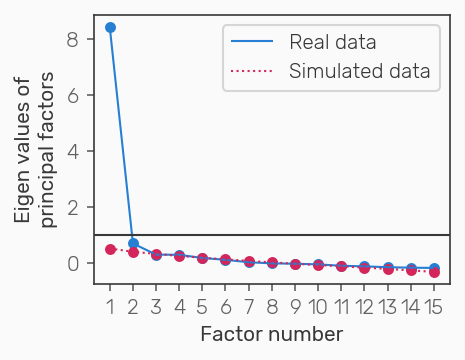

In [9]:
plt.figure(figsize=(3.2, 2.5), dpi=150)

plt.scatter(range(len(parallel_df)), parallel_df['real_values'], color=colours[0], s=18)
plt.plot(parallel_df['real_values'], color=colours[0], label='Real data')

plt.scatter(range(len(parallel_df)), parallel_df['sim_values'], color=colours[1], s=18)
plt.plot(parallel_df['sim_values'], color=colours[1], linestyle=':', label='Simulated data')
plt.ylabel('Eigen values of\nprincipal factors')
plt.xlabel('Factor number')
plt.axhline(1)
plt.xticks(range(len(parallel_df)), range(1, len(parallel_df) + 1));
plt.legend()

plt.tight_layout()
plt.savefig('../figures/parallel_analysis_T1.svg')

## Convergent validity

In [10]:
convergent_validity_df = pd.read_csv('../data/convergent_validity_df.csv')
convergent_validity_df.columns = [i.replace('_scores', '') for i in convergent_validity_df.columns]

In [11]:
corr = convergent_validity_df.corr()
corr

,ARVIS,STICSA,OASIS,BDI,SHAI,SIA,SPQ
ARVIS,1.000000,0.165955,0.282556,0.154917,0.260026,0.095094,0.068174
STICSA,0.165955,1.000000,0.645193,0.737524,0.586840,0.463602,0.414685
OASIS,0.282556,0.645193,1.000000,0.654864,0.486088,0.325214,0.309408
BDI,0.154917,0.737524,0.654864,1.000000,0.528128,0.380424,0.380420
SHAI,0.260026,0.586840,0.486088,0.528128,1.000000,0.355497,0.423110
SIA,0.095094,0.463602,0.325214,0.380424,0.355497,1.000000,0.735560
SPQ,0.068174,0.414685,0.309408,0.380420,0.423110,0.735560,1.000000


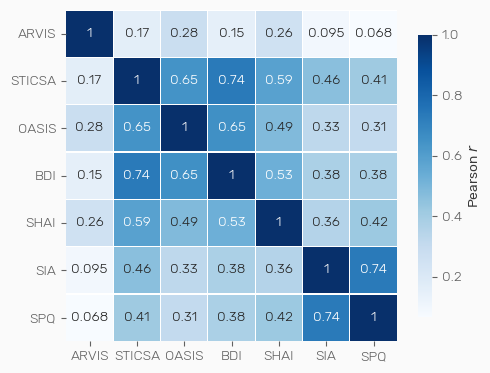

In [12]:
plt.figure(figsize=(5, 5), dpi=100)
g = sns.heatmap(corr, cmap='Blues', square=True, annot=True, linewidths=.2, cbar_kws={"label": r"Pearson $r$", 'shrink': 0.6})
g.set_yticklabels(g.get_yticklabels(), rotation = 0);
plt.tight_layout()
plt.savefig('../figures/convergent_validity.svg')

## Test-retest

In [13]:
retest_scores = pd.read_csv('../data/retest_scores.csv')
retest_scores.head()

,subjectID,T1_scores,T2_scores
0,sub0002,21,22
1,sub0007,17,12
2,sub0008,26,25
3,sub0012,20,19
4,sub0013,26,26


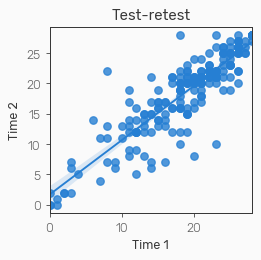

In [14]:
plt.figure(figsize=(3, 3), dpi=90)
sns.regplot('T1_scores', 'T2_scores', data=retest_scores, color=colours[0])
plt.xlabel('Time 1')
plt.ylabel('Time 2')
plt.title('Test-retest')

plt.tight_layout()
plt.savefig('../figures/test_retest.svg')